# Проект: Анализ бизнес-показателей

Цель проекта: узнать причины убытков рекламы в приложении Procrastinate Pro+.  

Задачи: 1. составить портрет пользователей;  
2. посмотреть расходы на маркетинг по различным рекламным каналам;  
3. определить, какие каналы окупаются и не окупаются.

##  Описание данных

Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта.
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.
 
Файл orders_info_short.csv хранит информацию о заказах.
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Файл costs_info_short.csv хранит информацию о расходах на рекламу.
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

## Загрузка данных и подготовка к анализу

In [1]:
#загружаем нужные библиотеки
import pandas as pd
from datetime import datetime, timedelta
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#загружаем данные
try:
    visits, orders, costs = (
        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv')
    )


except:
    visits, orders, costs = (
        pd.read_csv('visits_info_short.csv'),
        pd.read_csv('orders_info_short.csv'),
        pd.read_csv('costs_info_short.csv')
    )

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
# выполняем предобработку данных из таблицы visits 
print(visits.info())

# переименовываем колонки
visits.columns=['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
#visits.head()

# приводим колонки с датой к формату datetime
visits['session_start']=pd.to_datetime(visits['session_start'])
visits['session_end']=pd.to_datetime(visits['session_end'])
#visits.info()

# ищем пропуски
print(visits.isna().sum())

#ищем дубликаты 
print(visits.duplicated().sum())

# пропусков и дубликатов нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64
0


In [5]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [6]:
# выполняем предобработку данных из таблицы orders 
print(orders.info())

# переименовываем колонки
orders.columns=['user_id', 'event_dt', 'revenue']

# приводим колонки с датой к формату datetime
orders['event_dt']=pd.to_datetime(orders['event_dt'])

# ищем пропуски
print(orders.isna().sum())

#ищем дубликаты 
print(orders.duplicated().sum())

# пропусков и дубликатов нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
user_id     0
event_dt    0
revenue     0
dtype: int64
0


In [7]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [8]:
# выполняем предобработку данных из таблицы costs 
print(costs.info())

# переименовываем колонки
costs.columns=['dt', 'channel', 'costs']

# приводим колонки с датой к формату datetime
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

# ищем пропуски
print(costs.isna().sum())

#ищем дубликаты 
print(costs.duplicated().sum())

# пропусков и дубликатов нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
dt         0
channel    0
costs      0
dtype: int64
0


Предобработка данных проведена: данные приведены к нужным типам, пропусков и дубликатов нет.

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Задаем функцию get_profiles() для создания профилей пользователей

In [9]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [10]:
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-09 17:29:23,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-16 11:56:00,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-30 03:46:29,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-11 19:18:43,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-11 21:13:47,False,0.250435


#### Задаем функцию get_retention() для подсчёта Retention Rate

In [11]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw  = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Задаем функцию get_conversion() для подсчёта конверсии

In [12]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Задаем функцию get_ltv() для подсчёта LTV

In [13]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
  
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Задаем функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [14]:
# функция для сглаживания данных
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [15]:
# функция для построения графика удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [16]:
# функция для графика конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [17]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных


#### Профили пользователей, момент и горизонт анализа

In [18]:
#профили пользователей
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-28 08:33:02,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-21 00:35:17,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-23 02:57:06,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-28 21:28:09,False,0.205714


По условиям проекта, "на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения". В соответствии с этим задаем момент и горизонт анализа.

In [19]:
#момент анализа
observation_date = datetime(2019, 11, 1).date()

#горизонт анализа
analysis_horizon = 14

#  минимальная дата привлечения
min_analysis_date = profiles['dt'].min()

# максимальная дата привлечения
max_analysis_date =  observation_date - timedelta(days=analysis_horizon - 1) 

In [20]:
print('Минимальная дата привлечения:', min_analysis_date)
print('Максимальная дата привлечения:', max_analysis_date)

Минимальная дата привлечения: 2019-05-01
Максимальная дата привлечения: 2019-10-19


Минимальная дата привлечения пользователей - это самая ранняя отметка времени в столбце с датой. Максимальная - это самая поздняя дата, которую мы можем взять, чтобы пользователи успели "прожить" две недели в приложении.

#### Доля платящих пользователей по странам

In [21]:
payers_region=profiles.pivot_table(index='region', columns='payer', values='user_id', aggfunc='count')
payers_region.columns=['non_payer', 'payer']
payers_region['share']=payers_region['payer']/(payers_region['payer']+payers_region['non_payer'])*100
payers_region.sort_values(by='share', ascending=False)

,non_payer,payer,share
region,,,
United States,93100,6902,6.901862
Germany,14365,616,4.111875
UK,16875,700,3.982930
France,16787,663,3.799427


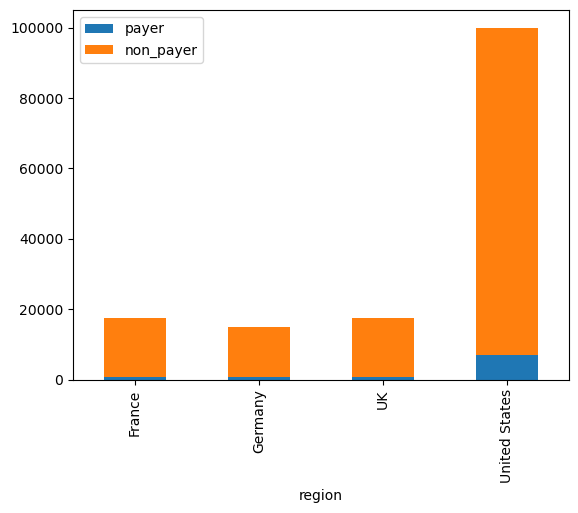

In [22]:
payers_region[['payer', 'non_payer']].plot(kind='bar', stacked=True);

Больше всего пользователей - как платящих, так и неплатящих - из США. Там же и самый высокий процент пользователей, совершивших покупку - 6,9%. Также приложением пользуются во Франции, Германии и Великобритании. Самый низкий процент платящих пользователей - во Франции, всего 3,7%. Немного выше этот показатель в Великобритании - 3,9% и в Германии - 4,1%.

#### Устройства пользователей и доля платящих по ним

Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [23]:
payers_device=profiles.pivot_table(index='device', columns='payer', values='user_id', aggfunc='count')
payers_device.columns=['non_payer', 'payer']
payers_device['share']=payers_device['payer']/(payers_device['payer']+payers_device['non_payer'])*100
payers_device.sort_values(by='share', ascending=False)

,non_payer,payer,share
device,,,
Mac,28130,1912,6.364423
iPhone,51097,3382,6.207897
Android,32982,2050,5.851793
PC,28918,1537,5.046790


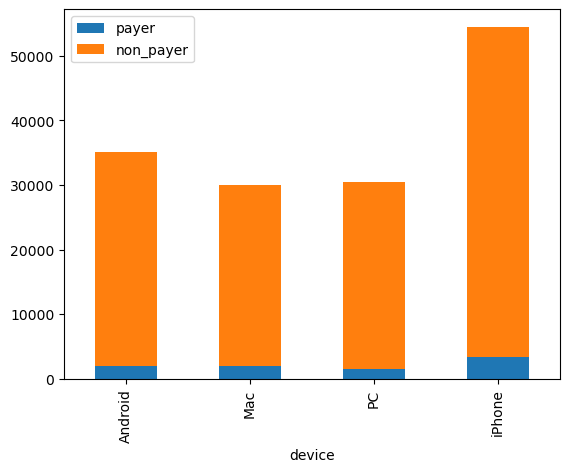

In [24]:
payers_device[['payer', 'non_payer']].plot(kind='bar', stacked=True);

Мы видим, что в приложение предпочитают заходить с мобильных девайсов - с большим отрывом лидирует iPhone, далее следует Android, чуть отстают Mac и PC. Есть разница в количестве покупок с разных устройств. Процент платящих пользователей немного выше среди "яблочников" - 6.3% для Mac и 6,2% для iPhone. Владельцы устройств на Android совершают покупки чуть реже - их доля составляет 5,8%. Реже всего платят пользователи PC - таких всего 5%.

#### Каналы привлечения пользователей

In [25]:
payers_channel=profiles.pivot_table(index='channel', columns='payer', values='user_id', aggfunc='count')
payers_channel.columns=['non_payer', 'payer']
payers_channel['share']=payers_channel['payer']/(payers_channel['payer']+payers_channel['non_payer'])*100
payers_channel.sort_values(by='share', ascending=False)

,non_payer,payer,share
channel,,,
FaceBoom,25587,3557,12.204914
AdNonSense,3440,440,11.340206
lambdaMediaAds,1924,225,10.469986
TipTop,17683,1878,9.600736
RocketSuperAds,4096,352,7.913669
WahooNetBanner,8100,453,5.296387
YRabbit,4147,165,3.826531
MediaTornado,4208,156,3.574702
LeapBob,8291,262,3.063253


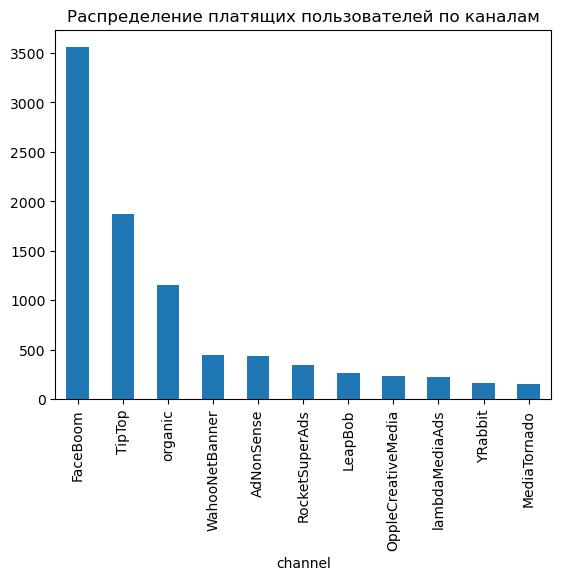

In [26]:
payers_channel['payer'].sort_values(ascending=False).plot(kind='bar', title='Распределение платящих пользователей по каналам');

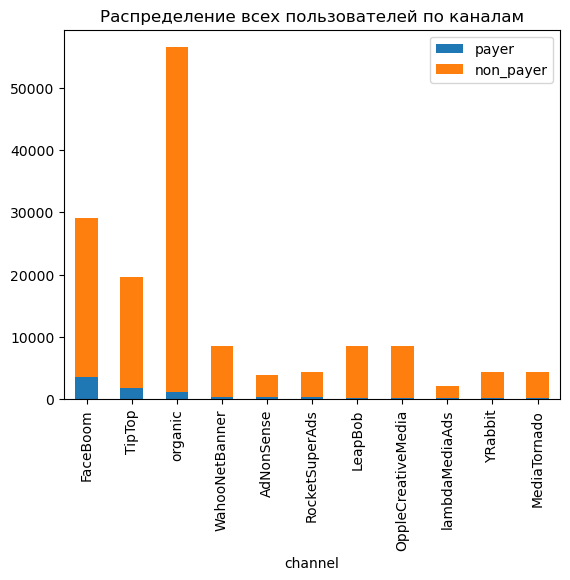

In [27]:
payers_channel[['payer', 'non_payer']].sort_values(by='payer', ascending=False).plot(kind='bar', stacked=True, title='Распределение всех пользователей по каналам');

Мы получили интересные результаты: больше всего пользователей пришло из органических каналов, но среди них самый низкий процент платящих - 2%. Самыми популярными рекламными каналами стали FaceBoom и TipTop: они привлекли больше всего пользователей, не считатая органиков, и конверсия составила 12,2% и 9,6% соответственно. А, например, каналы AdNonSense и lambdaMediaAds показали высокую конверсию, но привлекли мало пользователей.

## Маркетинг



#### Общая сумма расходов на маркетинг

In [28]:
print('Общая сумма расходов на маркетинг:', round(costs['costs'].sum()))

Общая сумма расходов на маркетинг: 105497


#### Распределение трат по рекламным источникам

In [29]:
costs.groupby('channel')['costs'].agg('sum').sort_values(ascending=False)

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

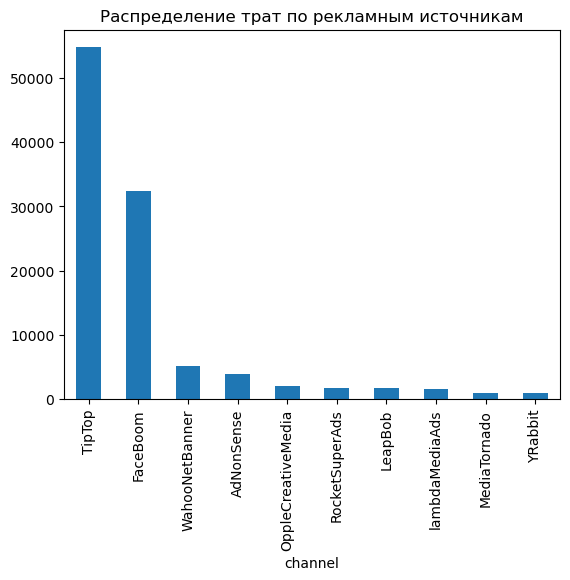

In [30]:
costs.groupby('channel')['costs'].agg('sum').sort_values(ascending=False).plot(kind='bar', title='Распределение трат по рекламным источникам');

Большая часть расходов приходится на TipTop и FaceBoom. Как мы узнали до этого, они привлекают больше всего пользователей. Окупаемость рекламы проверим на следующем этапе.    

#### Динамика изменения расходов во времени по каждому источнику

In [31]:
# добавляем столбцы со значением месяца и недели в таблицу costs
costs['date']=costs['dt'] #здесь я дублирую столбец с датой и перевожу в datetime, 
# т.к. нам нужны месяцы и недели, а costs['dt'] имеет тип object, 
# а если перевести его в datetime, то не работает функция get_profiles()
costs['date']=pd.to_datetime(costs['date'])
costs['month']=costs['date'].dt.month
costs['week']=costs['date'].dt.isocalendar().week
costs.head()

,dt,channel,costs,date,month,week
0,2019-05-01,FaceBoom,113.3,2019-05-01,5,18
1,2019-05-02,FaceBoom,78.1,2019-05-02,5,18
2,2019-05-03,FaceBoom,85.8,2019-05-03,5,18
3,2019-05-04,FaceBoom,136.4,2019-05-04,5,18
4,2019-05-05,FaceBoom,122.1,2019-05-05,5,18


In [32]:
#costs.info()

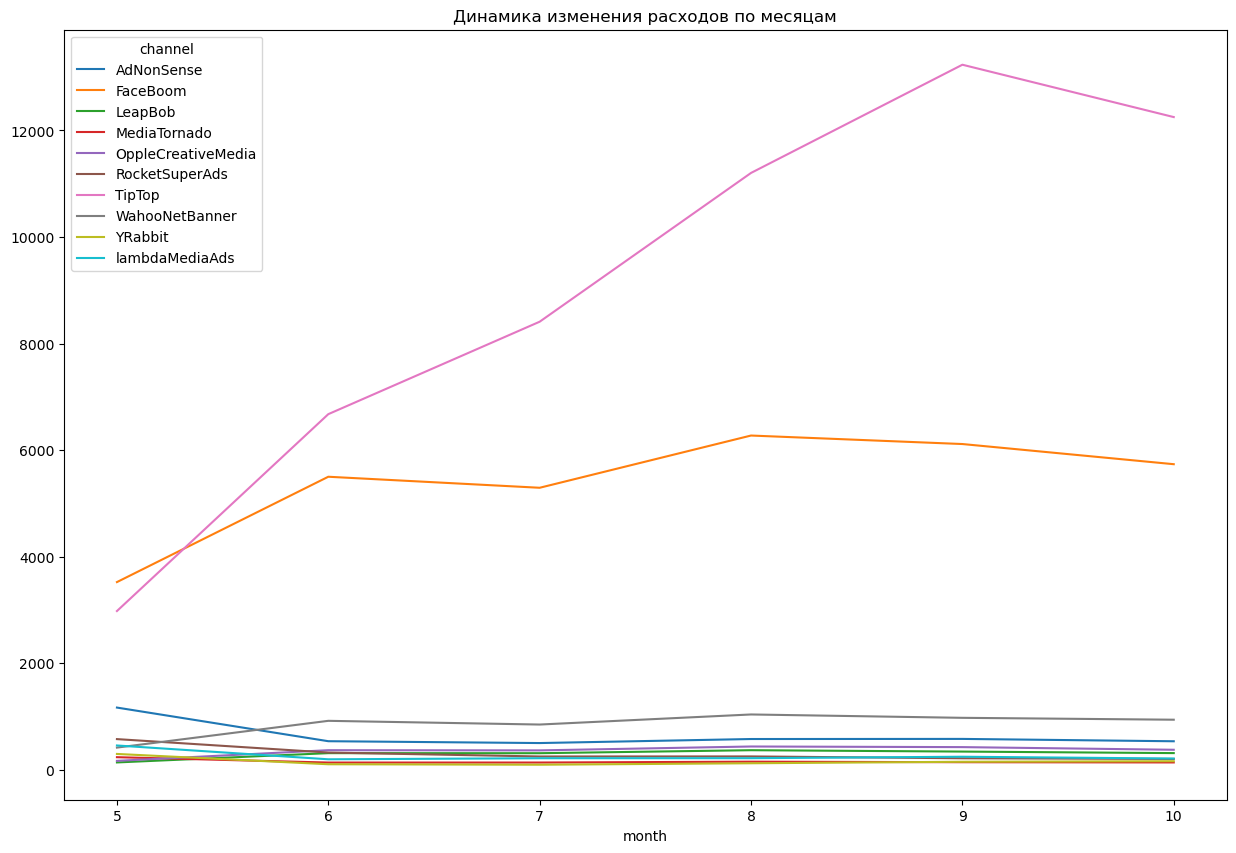

In [33]:
# строим график расходов на рекламу по месяцам
costs.pivot_table(index=['month'], values='costs', columns='channel', aggfunc='sum').plot(figsize=(15,10), title='Динамика изменения расходов по месяцам');

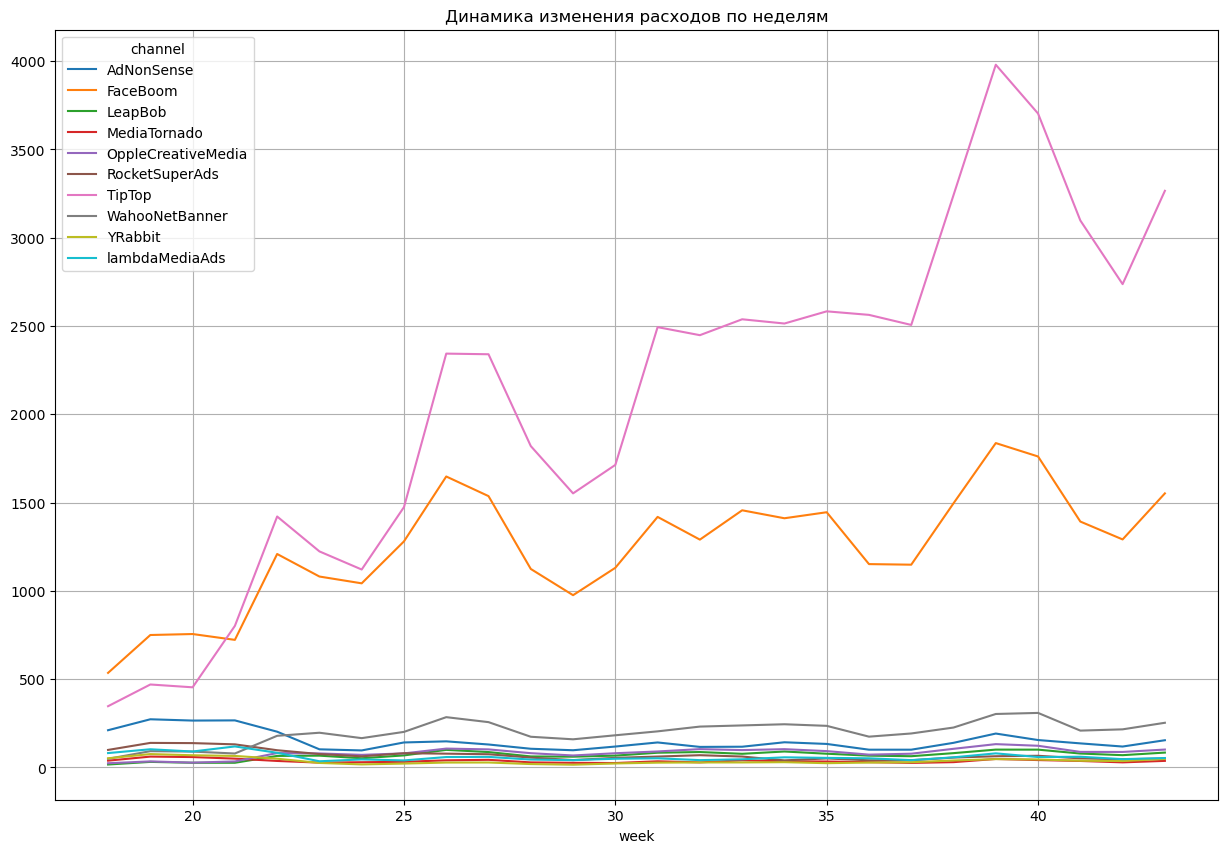

In [46]:
# строим график расходов на рекламу по неделям
costs.pivot_table(index=['week'], values='costs', columns='channel', aggfunc='sum').plot(figsize=(15,10), title='Динамика изменения расходов по неделям', grid=True);

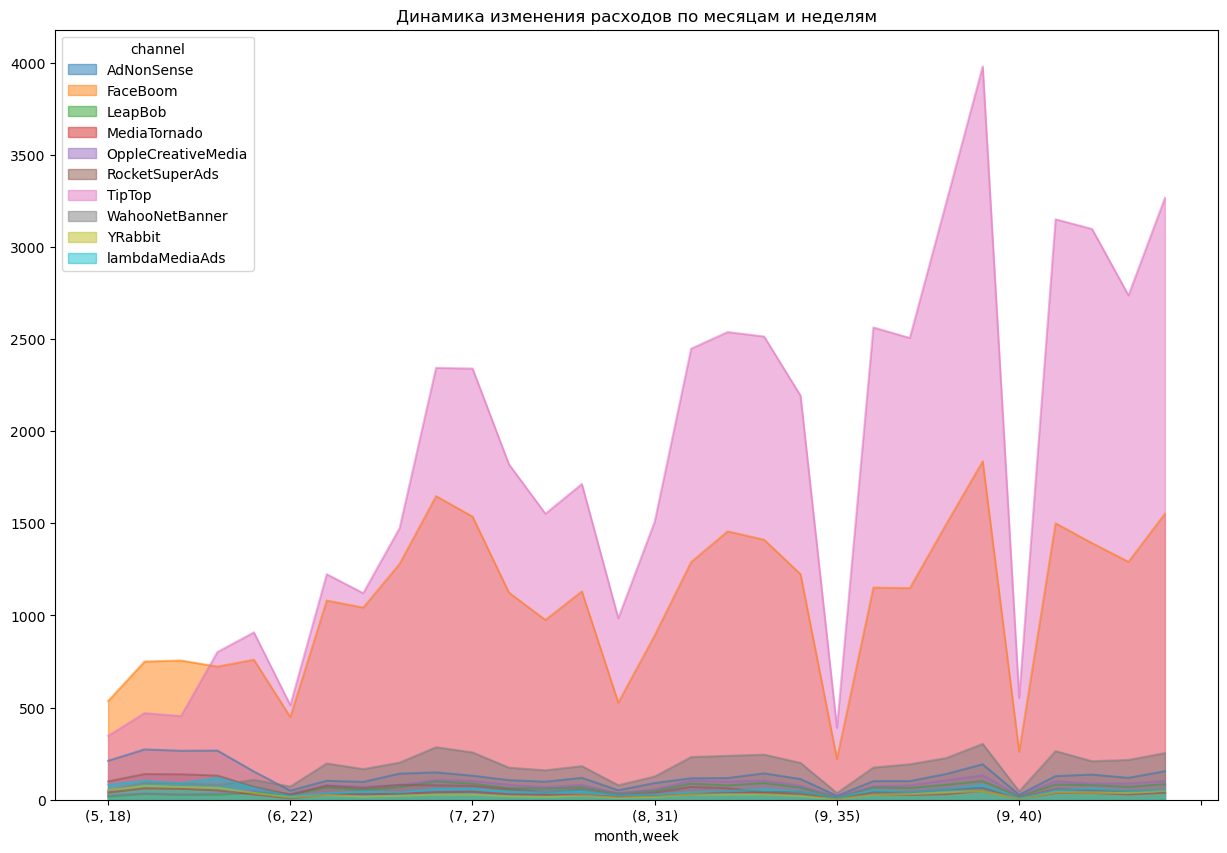

In [35]:
# строим график расходов на рекламу по месяцам и неделям
costs.pivot_table(index=['month','week'], values='costs', columns='channel', aggfunc='sum').plot.area(figsize=(15,10), stacked=False, title='Динамика изменения расходов по месяцам и неделям');

Затраты на два самых популярных канала выросли в 3 раза (FaceBoom) и 5 раз (TipTop) в период с мая по октябрь. Мы видим несколько "провалов" на графике, когда траты на рекламу резко уменьшались для всех источников: в конце мая, июля, августа и начале сентября. Видимо, под конец месяца рекламный бюджет истощается. В начале мая ставка на рекламу, видимо, делалась на FaceBoom - в него вложили больше всего денег, но уже к середине месяца TipTop его обогнал и стабильно составлял большую часть трат.

#### Средняя стоимость привлечения пользователя

In [36]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769


In [37]:
#сколько в среднем стоило привлечение одного пользователя из каждого источника
profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean').sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Самым дорогим рекламным каналом является TipTop (2,7). На втором и третьем месте почти одинаковые по CAC FaceBoom (1,1) и AdNonSense (1). Органические пользователи достаются бесплатно, при проверке окупаемости рекламы мы их исключим. 

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Анализ окупаемости рекламы

In [38]:
# исключаем органических пользователей, на них трат нет
profiles = profiles.query('channel != "organic"')

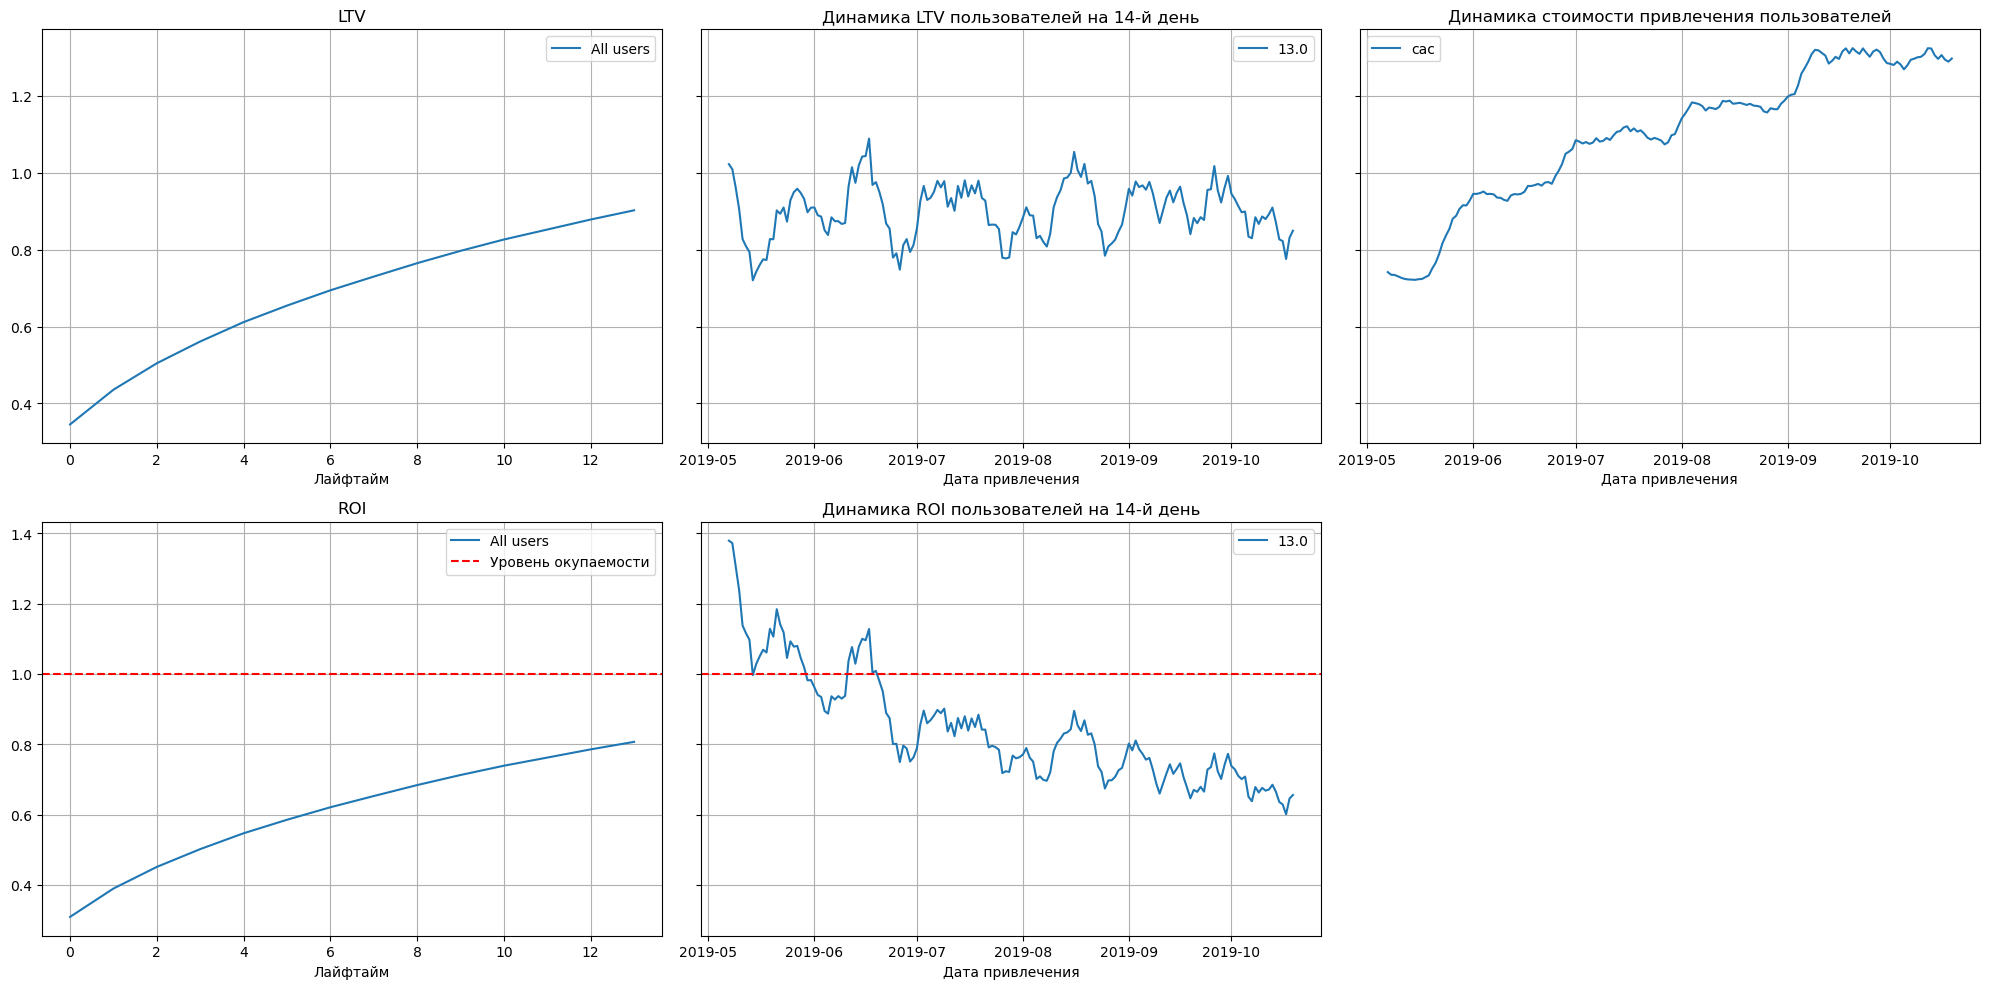

In [39]:
# строим графики LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, analysis_horizon)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

LTV и ROI не снижаются - значит, расчеты верны. По графикам мы видим, что реклама не окупается, а стоимость привлечения клиента только растет. Динамика ROI пользователей на 14 день показывает, что окупаются только клиенты, привлеченные в мае и июне, а дальше кривая падает. 

#### Конверсия и удержание пользователей

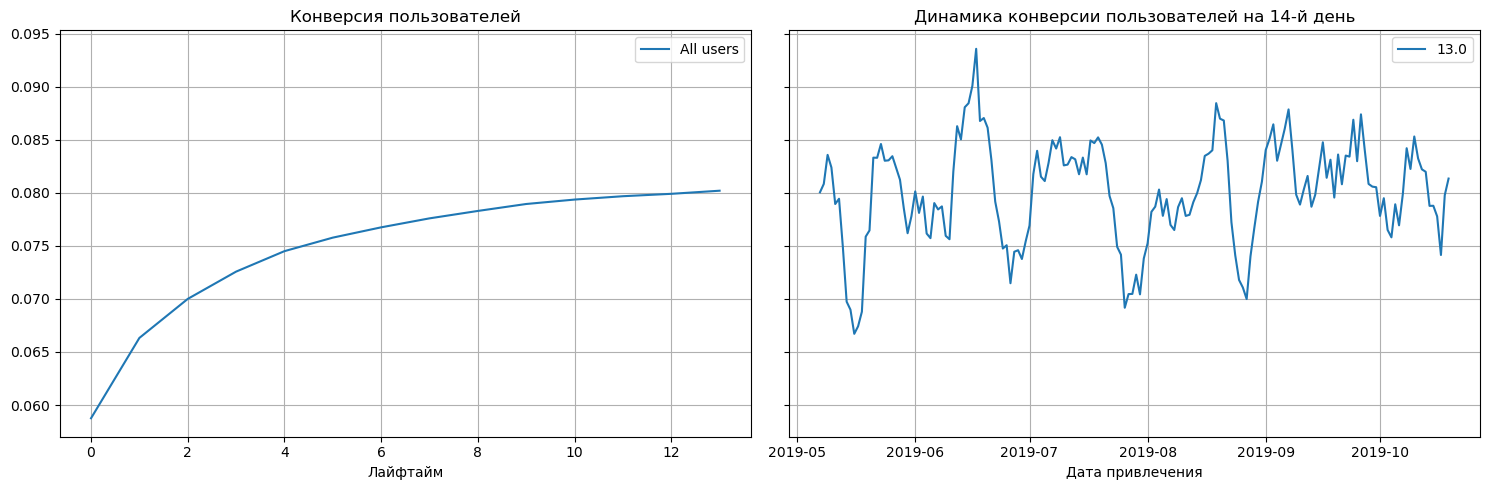

In [40]:
# строим график конверсии и динамики конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, analysis_horizon)
plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

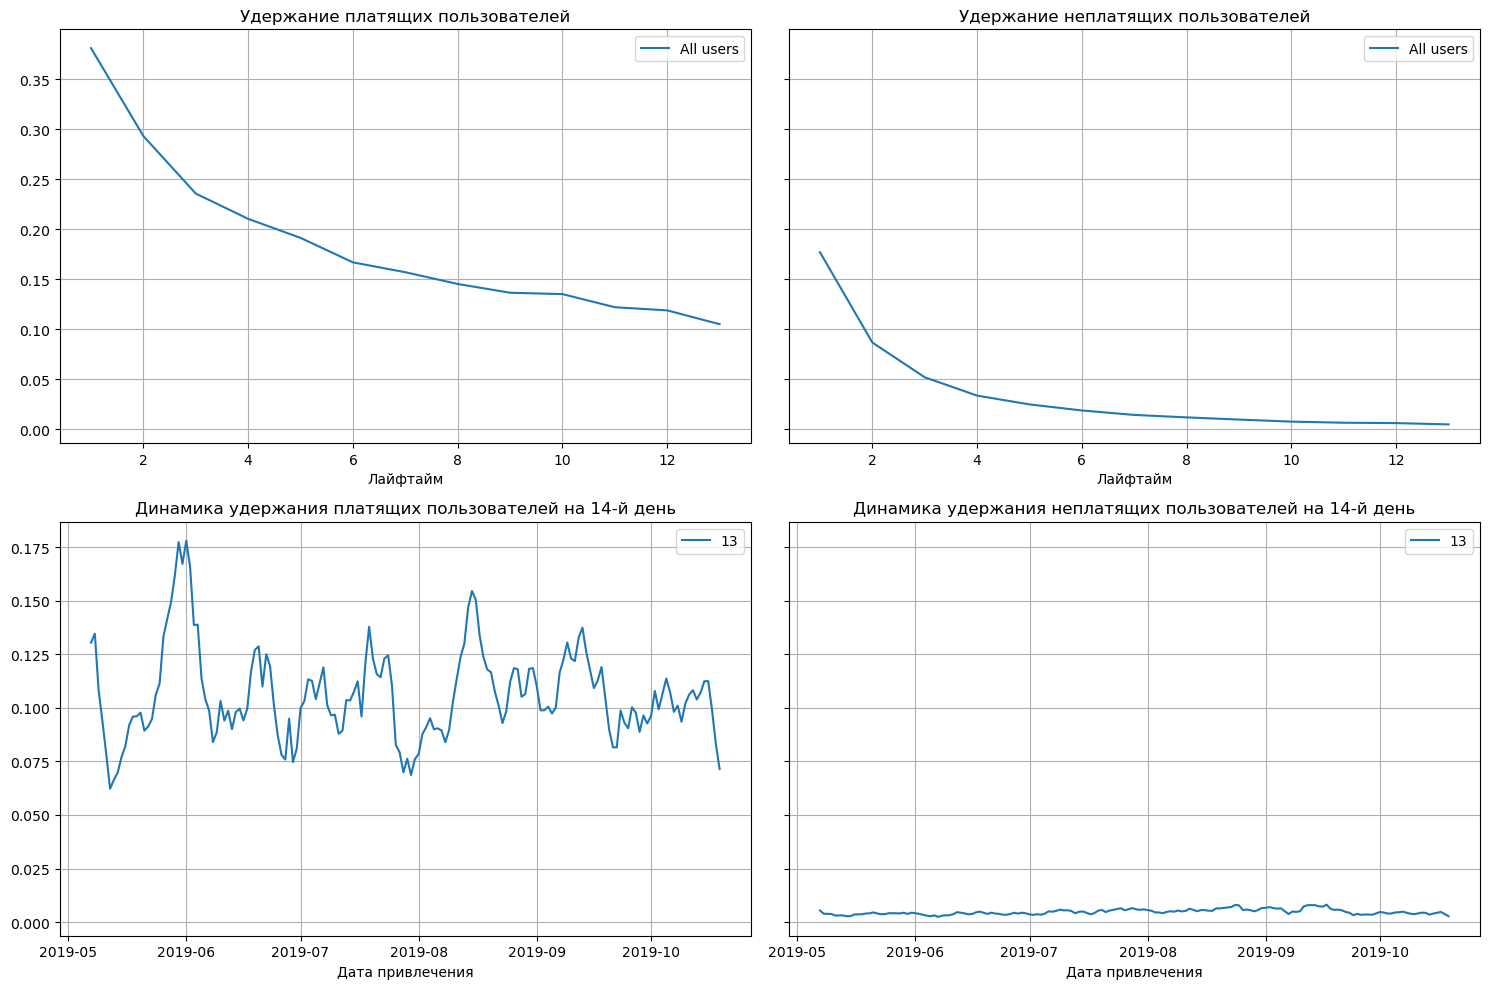

In [41]:
# строим график удержания и динамики удержания
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, analysis_horizon)
plot_retention(retention_grouped, retention_history, analysis_horizon)

Конверсия пользователей растет, но достигает всего 80% к 12 дню лайфтайма. Выше всего конверсия у пользователей, привлеченных в июне: больше 90%. Удержание пользователей уменьшается на протяжении всего периода наблюдения, однако платящих клиентов остается все-таки больше, чем неплатящих. Далее мы посмотрим, как будет меняться окупаемость рекламы в зависимости от каналов, устройств пользователей, их стран.

#### Окупаемость рекламы с разбивкой по устройствам

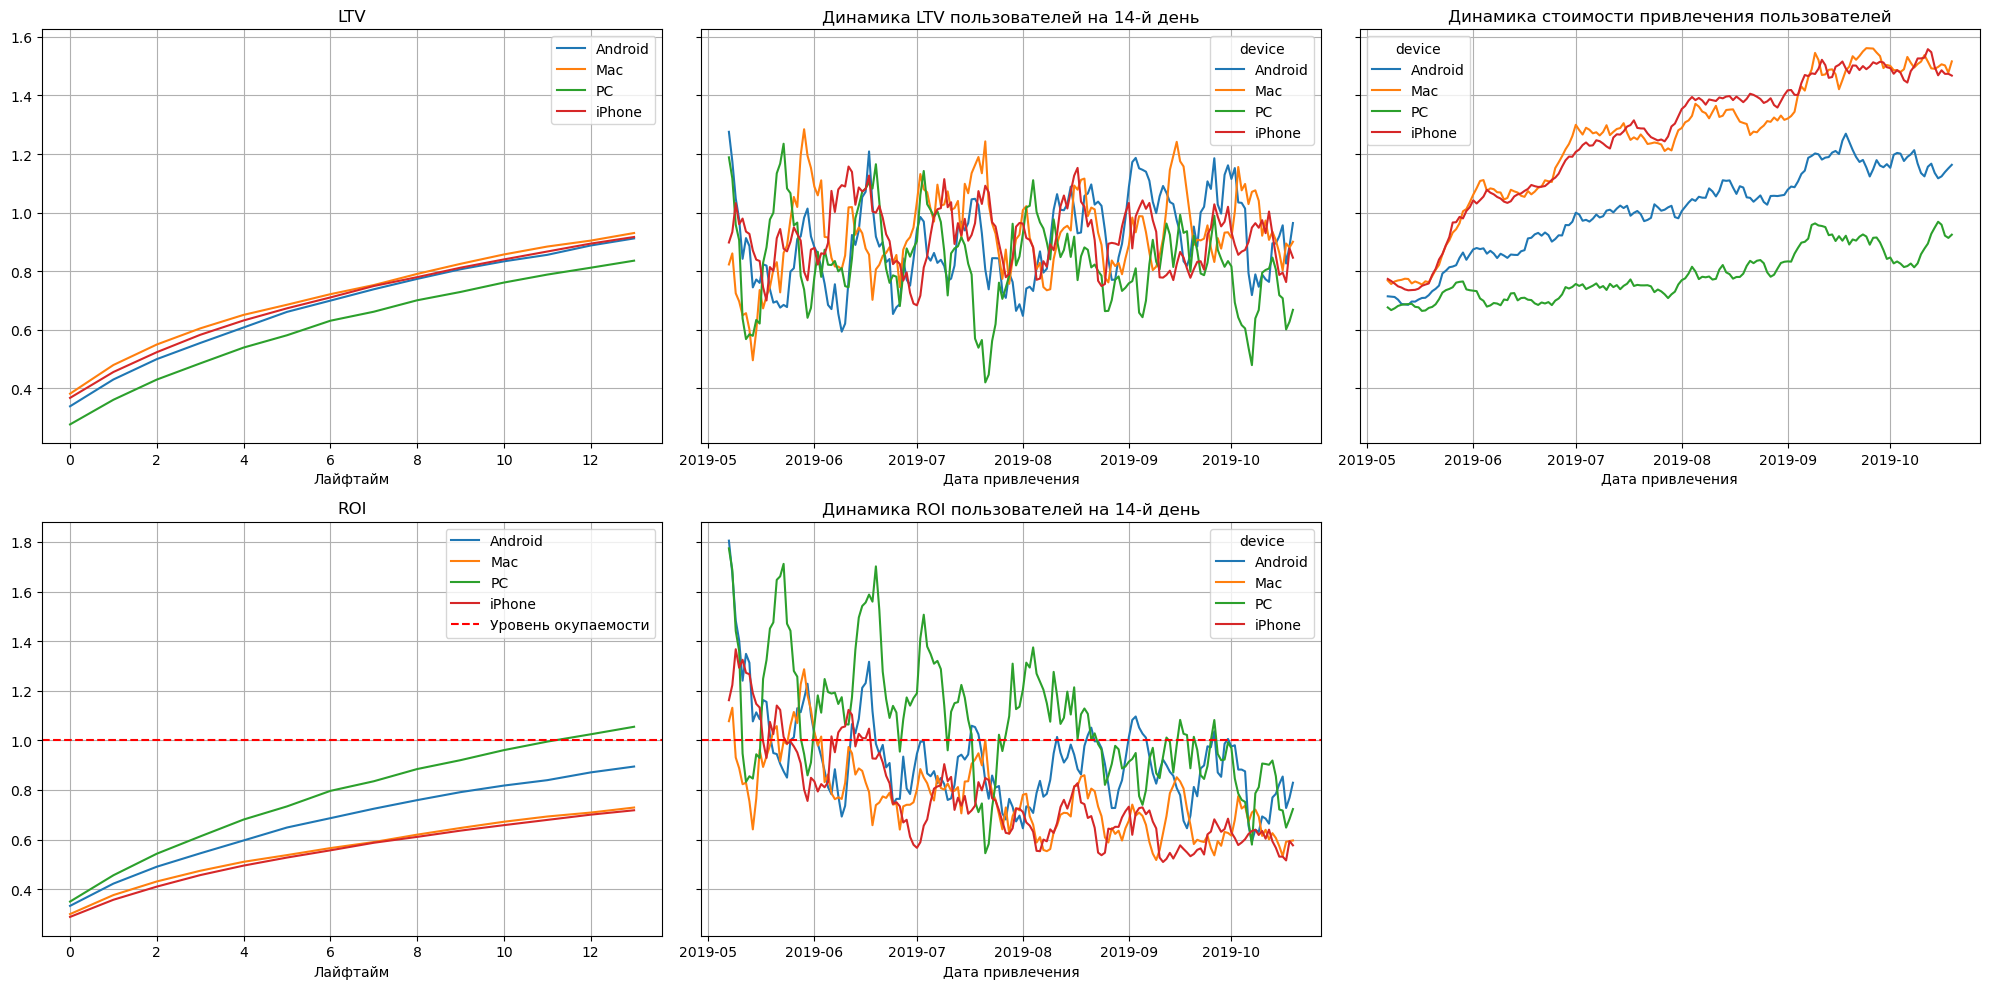

In [42]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions=dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

Пользователи PC - единственные, кто окупаются. К тому же, они имеют самую низкую стоимость привлечения по сравнению с остальными. Однако, судя по графику динамики ROI, в августе даже они перестали окупаться. Пользователи iPhone и MAC показывают прямо противоположную картину: при самой высокой стоимости привлечения они приносят меньше всего дохода. 

#### Окупаемость рекламы с разбивкой по странам

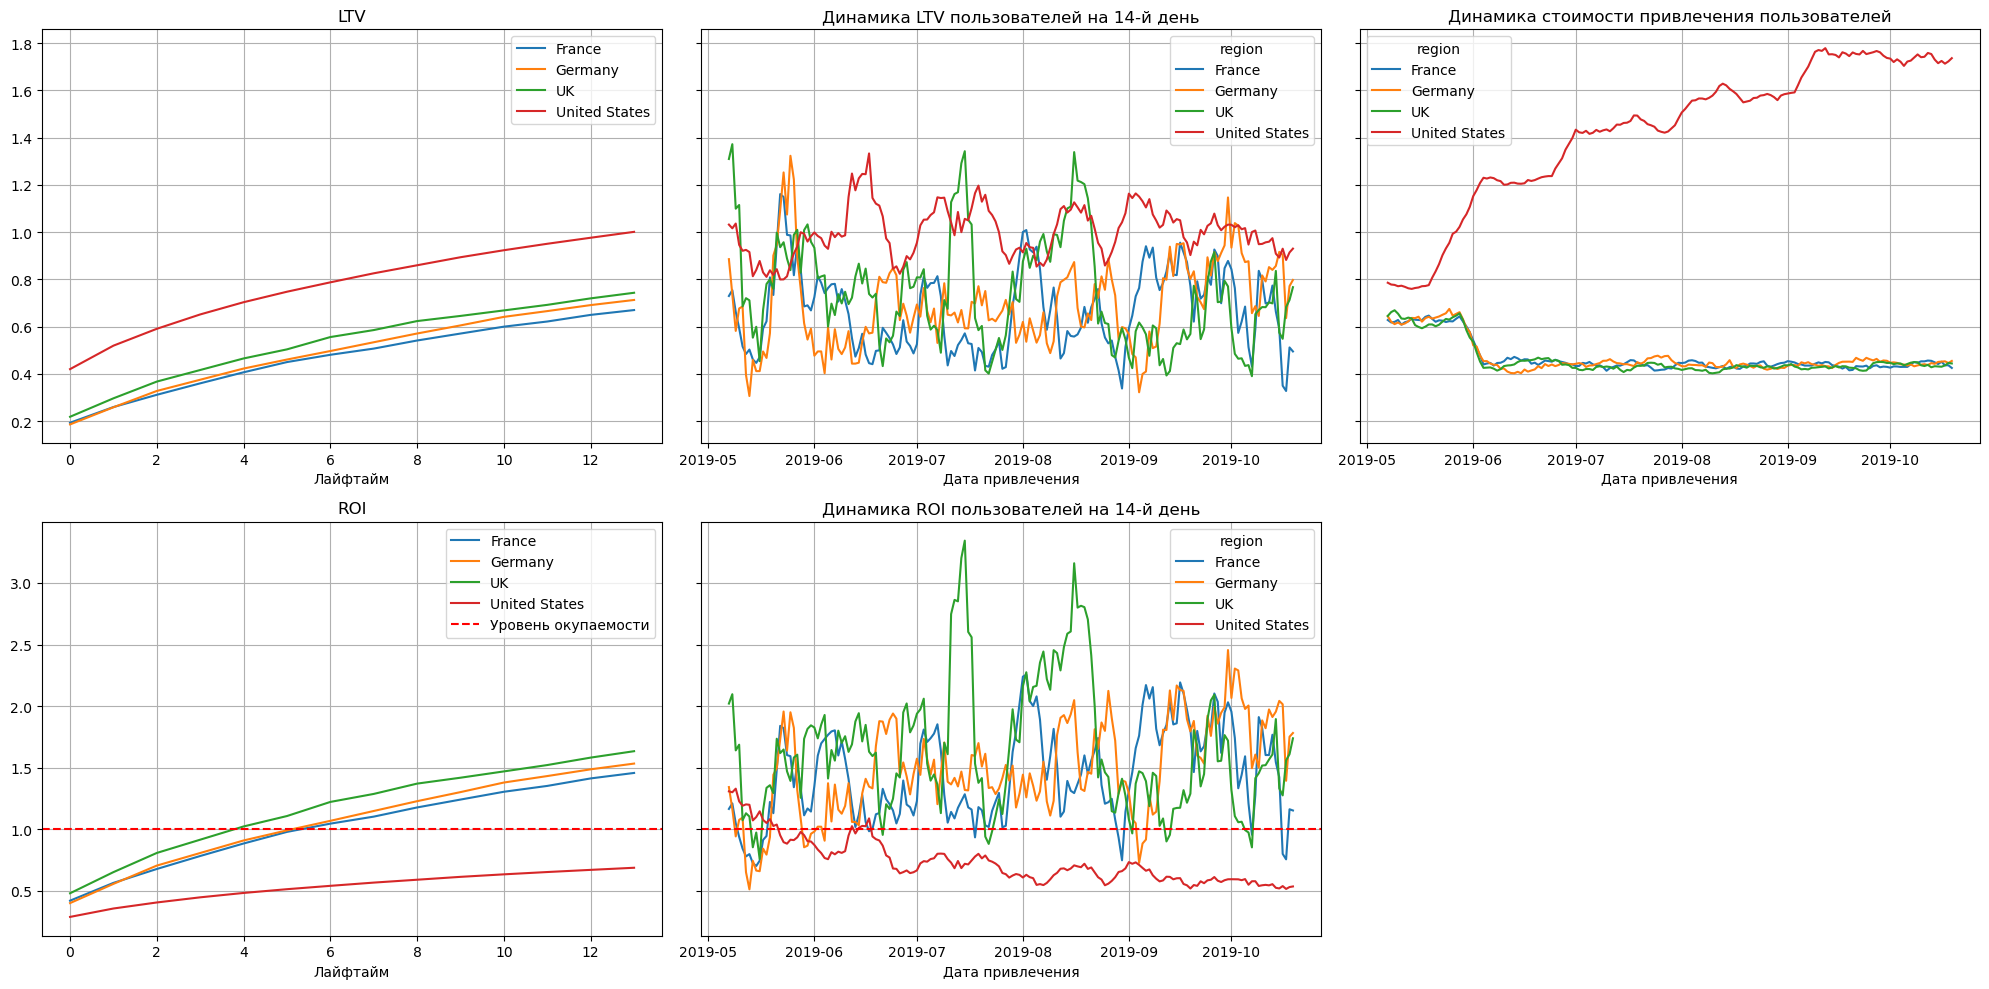

In [43]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions=dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

Возможно, мы наконец нашли источник проблемы: пользователи из США не окупаются. С июня для их привлечения расходы резко возросли, а для остальных стран снизились, хотя как раз пользователи из Франции, Германии и Великобритании окупаются. Необходимо поработать над рекламой для пользователей США, ведь они составляют основную часть пользователей приложения.

#### Окупаемость рекламы с разбивкой по рекламным каналам

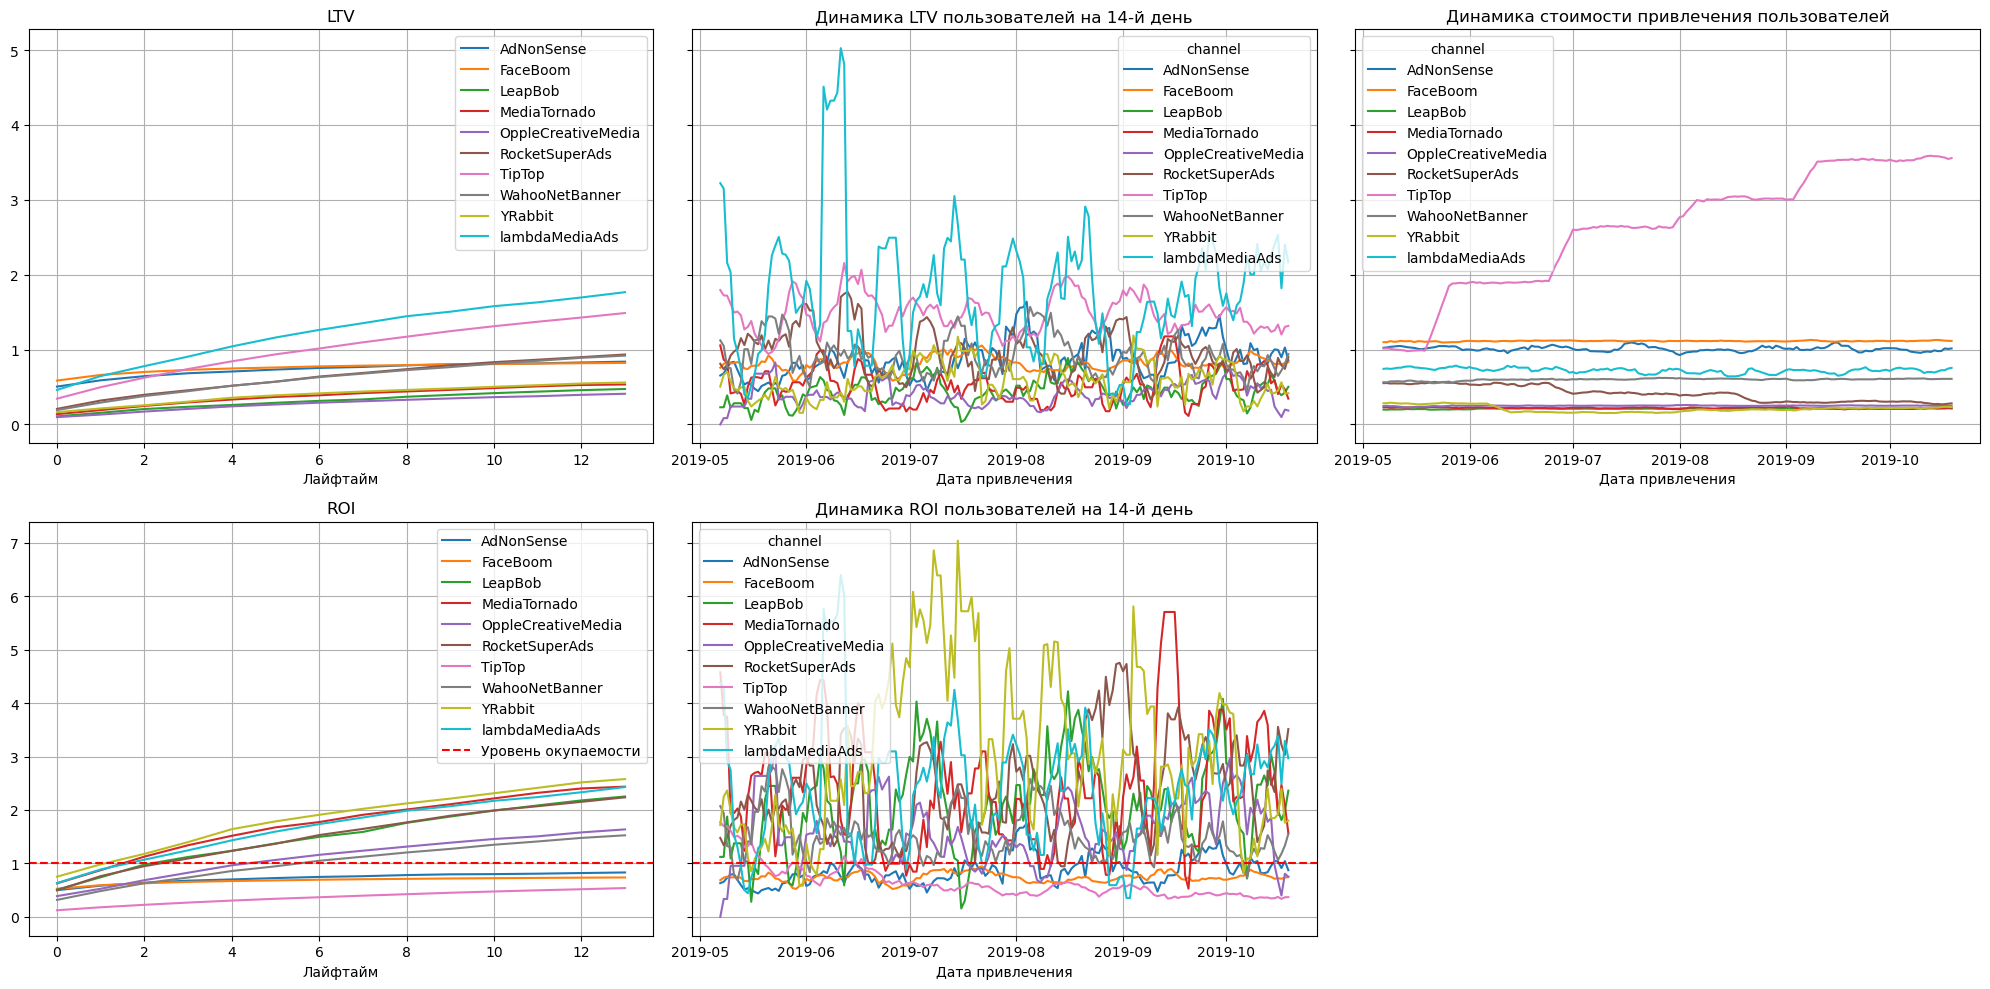

In [44]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions=dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

Не окупаются совсем всего три канала: AdNonSense, Faceboom и TipTop. Вот и второй ключик к разгадке: TipTop и Faceboom - самые затратные каналы. Даже несмотря на то, что они приводят больше всего пользователей, достаточно денег от них приложение не получает. Над этим явно нужно работать рекламному отделу.

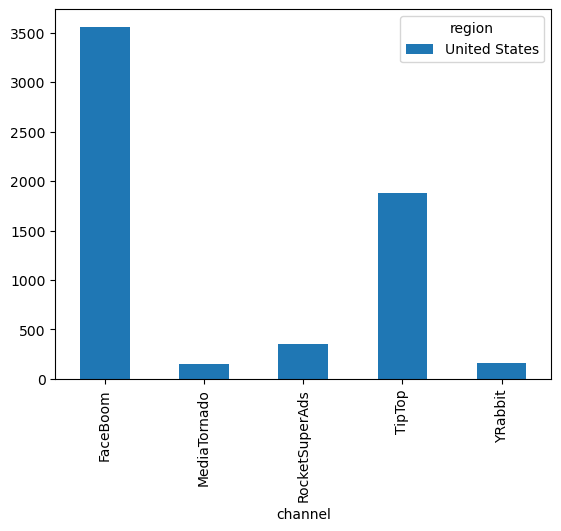

In [45]:
# рекламные каналы для пользователей из США
usa = profiles[profiles['payer']==True].pivot_table(index='channel', 
                                              columns = 'region', 
                                              values = 'user_id', 
                                              aggfunc='count').sort_values('United States').query('channel != "organic"')
usa=usa.loc[usa['United States'] > 0]
usa.pivot_table(index='channel').plot(kind='bar');

Помимо Faceboom и TipTop, в США есть еще три рекламных канала: RocketSuperAds, YRabbit, MediaTornado. У них низкая стоимость привлечения клиентов, как мы выяснили ранее, так что, возможно, стоит направить больше усилий на их развитие.

## Выводы


Мы проанализировали рекламу в приложении Procrastinate Pro+. Для этого мы узнали, в каких странах находятся пользователи приложения, какими устройствами пользуются, какими каналами они были привлечены. Основная доля пользователей - из США, которые предпочитают использовать мобильные устройства. Платящих клиентов больше среди юзеров Mac и iPhone. В большинстве случаев они привлекаются органически, а также через каналы Faceboom и TipTop.  
Далее мы узнали, что, несмотря на солидные вложения, реклама не окупается, и проверили, по каким причинам. Во-первых, бюджет был потрачен впустую на TipTop и Faceboom - при высокой стоимости привлечения клиента они совсем не окупаются. Во-вторых, в Европе низкая конверсия пользователей.   
Рекламному отделу стоит пересмотреть каналы привлечения: отказаться от AdNonSense, направить бюджет в RocketSuperAds, YRabbit, MediaTornado. Стоит снизить значительно снизить траты на Faceboom и TipTop и придумать новую рекламу: вряд ли стоит отказываться от них совсем, так как они приводят много пользователей. Также нужно продумать стратегию, как конвертировать органических пользователей: они составляют большую часть клиентов приложения, не требуют затрат на привлечение, а значит, потенциально могут принести хорошую прибыль.